<a href="https://colab.research.google.com/github/sakshi0303/ImageClassification/blob/main/Model4_increase_epochlimit(30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model-4**

-increase epochlimit(30)

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from ast import increment_lineno
#importing Libraries

import numpy as np 
import pandas as pd 
import os

#high quality image has high intensity of color, color of matrix are represented by rbg matrix
import random # for geeneratiing images

#data virtulisation 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # for vision related proessing

#importing tensor-flow for model creation and its dependencies
import tensorflow

#generate batches of tensor image data with real time data augumentation
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

# for enabling inline processing
%matplotlib inline

In [ ]:
#for accessing  mydrive  data mount on googlecolab 
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models


In [ ]:
! pip install -q kaggle


#Importing kaggle dataset directly to cobal notebook

Please follow the steps below to download and use kaggle data within Google Colab:
1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens
2. Click on Create New API Token - It will download kaggle.json file on your machine.
3. In Google Colab textbook run following commands:
  1. ! pip install -q kaggle
  2. from google.colab import files
    files.upload()
    Choose the kaggle.json file that you downloaded
  3. ! mkdir ~/.kaggle
  4. ! cp kaggle.json ~/.kaggle/
    Make directory named kaggle and copy kaggle.json file there.
  5. ! chmod 600 ~/.kaggle/kaggle.json
    Change the permissions of the file.
  6. ! kaggle datasets list

reference:https://www.kaggle.com/general/74235

In [ ]:
from google.colab import files


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srvsakshi03","key":"41190edae2633d15326ff3cf72335b85"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# #This method helped me to download datasets that are not listed in the kaggle competitions.
# !kaggle datasets download -d maricinnamon/caltech101-airplanes-motorbikes-schooners -p /content/sample_data/ --unzip
#This method helped me to download datasets that are not listed in the kaggle competitions.
!kaggle datasets download -d maricinnamon/caltech101-airplanes-motorbikes-schooners -p /content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/ --unzip


 34% 5.00M/14.5M [00:00<00:00, 24.8MB/s]
100% 14.5M/14.5M [00:00<00:00, 51.9MB/s]


refernce:https://pypi.org/project/split-folders/

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/caltech101_classification", output="/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)


Copying files: 1661 files [00:00, 4187.23 files/s]


In [ ]:
TrainImagePath='/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/train'
TestImagePath='/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/test'
ValidImagePath='/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/val'

#defining preprocessing transformations on raw image of testing data
train_datagenerator= ImageDataGenerator(rescale=1./255, #originally pixel have intensity between 0 to 255, rescaling them to less than 1
                                        horizontal_flip=True, # mirror image from one direction to other direction
                                        shear_range=0.1, # tilt the angle of image
                                        zoom_range=0.1) # zoom in or out

#defining preprocessing transformation on testing data
test_datagenerator=ImageDataGenerator(rescale=1./255) 

training_set=train_datagenerator.flow_from_directory(TrainImagePath,target_size=(128,128),batch_size=32,class_mode='categorical')

testing_set=test_datagenerator.flow_from_directory(TestImagePath,
                                                    target_size=(128,128),
                                                    batch_size=32,class_mode='categorical')

valid_set=test_datagenerator.flow_from_directory(ValidImagePath,
                                                  target_size=(128,128),
                                                  batch_size=32,class_mode='categorical')


Found 1328 images belonging to 3 classes.
Found 168 images belonging to 3 classes.
Found 165 images belonging to 3 classes.


In [ ]:
testing_set.class_indices

{'Motorbikes': 0, 'airplanes': 1, 'schooner': 2}

In [ ]:
TrainClasses=training_set.class_indices

Resultmap={}
for ballvalue,ballname in zip(TrainClasses.values(),TrainClasses.keys()):
  Resultmap[ballvalue]=ballname

import pickle
with open("/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/ResultsMap.pk1",'wb') as f:
  pickle.dump(Resultmap,f,pickle.HIGHEST_PROTOCOL)

print("Mapping of face and its ID",Resultmap)

#The number of neurons for the output layer
OutputNeurons=len(Resultmap)
print('\n The number of output neurons',OutputNeurons)


Mapping of face and its ID {0: 'Motorbikes', 1: 'airplanes', 2: 'schooner'}

 The number of output neurons 3


In [ ]:
#### Create CNN deep learning model#######
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense


### Initializing the convolutional Neural Network
classifier=Sequential() 
classifier.add(Convolution2D(32,kernel_size=(3,3),strides=(1,1),input_shape=(128,128,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(96,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(128,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))

#flattening
classifier.add(Flatten())

#fully connected neural Network
classifier.add(Dense(256,activation='relu'))

# 2 clasifier--> sigmoid activation
#more that 2 clasifier-->  softmax activation code
classifier.add(Dense(OutputNeurons,activation='softmax'))

#compling the CNN
# categorical_crossentropy = measure of performance, error:loss(reduce the loss)/accuracy(increase the accuracy)
classifier.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])
#classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 96)       0

In [ ]:
#measuring the time taken by model to train
import time
StartTime=time.time()

#starting modeltraing
model_history=classifier.fit_generator(
                                       training_set,
                                       steps_per_epoch=len(training_set),
                                       epochs=30,
                                       validation_data=valid_set,
                                       validation_steps=len(valid_set),
                                       verbose=1)

EndTime=time.time()
print("Total Time Taken ",round((EndTime-StartTime)/60),'Minutes ####')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/30
42/42 [==============================] - 34s 795ms/step - loss: 0.7482 - accuracy: 0.6845 - val_loss: 0.2415 - val_accuracy: 0.9212
Epoch 2/30
42/42 [==============================] - 26s 627ms/step - loss: 0.2568 - accuracy: 0.9119 - val_loss: 0.1028 - val_accuracy: 0.9576
Epoch 3/30
42/42 [==============================] - 27s 648ms/step - loss: 0.1516 - accuracy: 0.9458 - val_loss: 0.5308 - val_accuracy: 0.8788
Epoch 4/30
42/42 [==============================] - 26s 625ms/step - loss: 0.1165 - accuracy: 0.9593 - val_loss: 0.0978 - val_accuracy: 0.9636
Epoch 5/30
42/42 [==============================] - 27s 644ms/step - loss: 0.2011 - accuracy: 0.9593 - val_loss: 0.0582 - val_accuracy: 0.9758
Epoch 6/30
42/42 [==============================] - 26s 627ms/step - loss: 0.0519 - accuracy: 0.9864 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7/30
42/42 [==============================] - 26s 623ms/step - loss: 0.0841 - accuracy: 0.9714 - val_loss: 0.0116 - val_accuracy: 0.9939

In [ ]:
accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']

loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

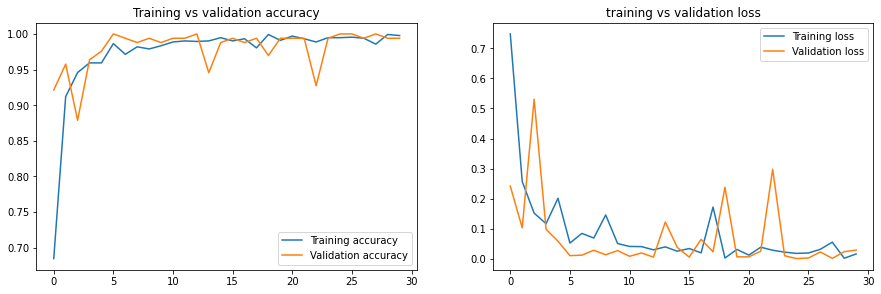

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(accuracy,label="Training accuracy")
plt.plot(val_accuracy,label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss,label="Training loss")
plt.plot(val_loss,label="Validation loss")
plt.legend()
plt.title("training vs validation loss")
plt.show()



In [ ]:
#Saving the model
classifier.save("/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/ImageClassifier.pk1")

In [ ]:
training_set.class_indices.items()

dict_items([('Motorbikes', 0), ('airplanes', 1), ('schooner', 2)])

###Testing the model

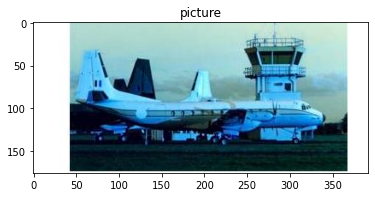

__________________________________________________
Prediction is:  airplanes


In [ ]:
#Making_single_predictions
from tensorflow.keras.utils import load_img,img_to_array

testImage="/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/test/airplanes/image_0013.jpg"
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
img=cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()
print("_"*50)
print('Prediction is: ',Resultmap[np.argmax(result)])

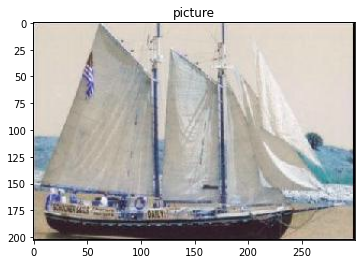

__________
Prediction is:  schooner


In [ ]:
#Making_single_predictions
from tensorflow.keras.utils import load_img,img_to_array

testImage="/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/test/schooner/image_0024.jpg"
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
img=cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()
print("_"*10)
print('Prediction is: ',Resultmap[np.argmax(result)])